# Pantheon+ likelihood Implementation

In this notebook we test the implementation of the [Union3 & UNITY1.5](https://arxiv.org/pdf/2311.12098.pdf) likelihood.

Author:
- Rodrigo Calderón

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from desilike.likelihoods.supernovae import Union3SNLikelihood

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [16]:
from desilike.theories import Cosmoprimo
cosmo = Cosmoprimo(engine='camb')

## Set priors for wCDM
cosmo.init.params = {'Omega_m': {'prior': {'limits': [0.01, 0.9]},
                          'ref': {'dist': 'norm', 'loc': 0.3, 'scale': 0.002},
                          'latex': '\Omega_m'},
                     'w0_fld': {'prior': {'limits': [-2, -0.3]},
                          'ref': {'dist': 'norm', 'loc': -1, 'scale': 0.05},
                          'latex': 'w'}
                     }

## Sampling

In [17]:
from desilike import setup_logging
from desilike.samplers import ZeusSampler

setup_logging()  # set up logging

likelihood=Union3SNLikelihood(cosmo=cosmo)

sampler = ZeusSampler(likelihood, save_fn=f'_tests/wCDM_Union3_*.npy', seed=42)
sampler.run(check={'max_eigen_gr': 0.03, 'stable_over': 1})
chains = sampler.chains[0].remove_burnin(0.5)

[000000.01] [0/1] 12-13 10:05  Union3SNLikelihood        INFO     Loading light-curve from /home/users/rcalderonb/.local/data/Union3SNLikelihood/union3_mu.dat
[000000.01] [0/1] 12-13 10:05  Union3SNLikelihood        INFO     Loading covariance from /home/users/rcalderonb/.local/data/Union3SNLikelihood/union3.cov
[000000.02] [0/1] 12-13 10:05  ZeusSampler               INFO     Varied parameters: ['Omega_m', 'w0_fld', 'dM'].
[000000.20] [0/1] 12-13 10:05  TaskManager               INFO     Entering TaskManager with 1 workers.
[000000.20] [0/1] 12-13 10:05  root                      INFO     Initialising ensemble of 8 walkers...
[000070.84] [0/1] 12-13 10:06  Chain                     INFO     Saving _tests/wCDM_Union3_0.npy.
[000070.89] [0/1] 12-13 10:06  ZeusSampler               INFO     Diagnostics:
[000070.90] [0/1] 12-13 10:06  ZeusSampler               INFO     - max eigen Gelman-Rubin - 1 is 0.184; not < 0.03.
[000070.92] [0/1] 12-13 10:06  ZeusSampler               INFO     - ma

/home/users/rcalderonb/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


[000135.84] [0/1] 12-13 10:07  Chain                     INFO     Saving _tests/wCDM_Union3_0.npy.
[000135.84] [0/1] 12-13 10:07  ZeusSampler               INFO     Diagnostics:
[000135.87] [0/1] 12-13 10:07  ZeusSampler               INFO     - max eigen Gelman-Rubin - 1 is 0.0353; not < 0.03.
[000135.90] [0/1] 12-13 10:07  ZeusSampler               INFO     - max diag Gelman-Rubin - 1 is 0.0328.
[000136.43] [0/1] 12-13 10:07  ZeusSampler               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 0.146.
[000136.44] [0/1] 12-13 10:07  ZeusSampler               INFO     - max Geweke is 0.488.
[000136.44] [0/1] 12-13 10:07  ZeusSampler               INFO     - Geweke p-value is 0.442.
[000136.45] [0/1] 12-13 10:07  ZeusSampler               INFO     - (300 iterations / integrated autocorrelation time) (reliable) is 54.4.
[000136.45] [0/1] 12-13 10:07  ZeusSampler               INFO     - max variation of integrated autocorrelation time is 0.414.
[000136.49] [0/1] 12-13 10:07  Ta

+---------+--------+--------+--------+-------+-----------------+-----------------+
|         | argmax |  mean  | median |  std  | quantile:1sigma | interval:1sigma |
+---------+--------+--------+--------+-------+-----------------+-----------------+
| Omega_m | 0.239  | 0.240  | 0.249  | 0.099 |   -0.11/+0.10   |  -0.089/+0.116  |
| w0_fld  | -0.72  | -0.76  | -0.74  | 0.18  |   -0.18/+0.18   |   -0.13/+0.22   |
|   dM    | -9.279 | -9.287 | -9.287 | 0.094 |  -0.093/+0.095  |  -0.088/+0.098  |
+---------+--------+--------+--------+-------+-----------------+-----------------+


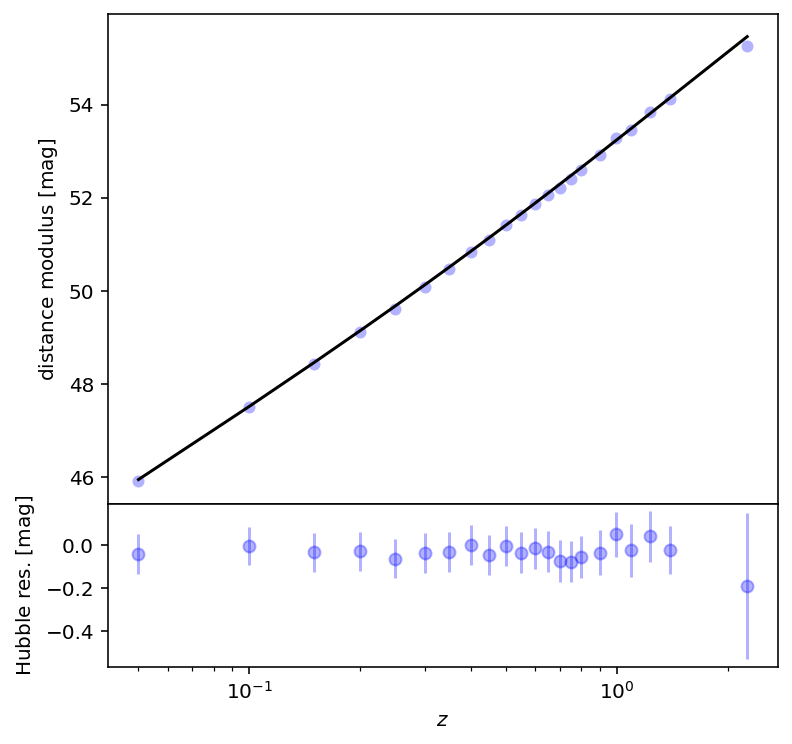

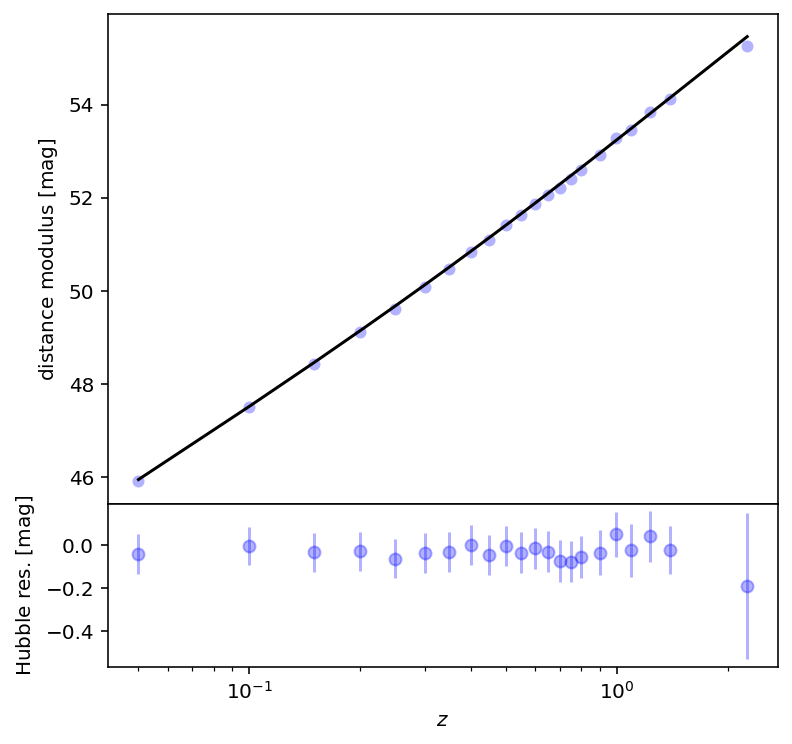

In [18]:
print(chains.to_stats(tablefmt='pretty'))
likelihood(**chains.choice(index='argmax', input=True))
likelihood.plot(show=True)

## Plotting

Let's load the precomputed chains (previous section).

Removed no burn in


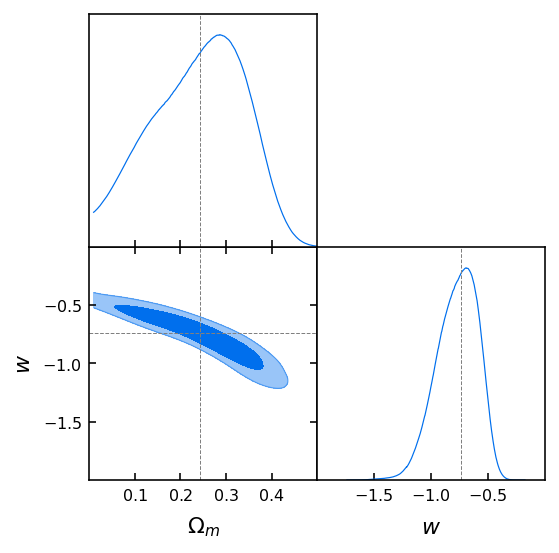

In [19]:
from desilike.samples import plotting

plotting.plot_triangle(chains[::10],params=['Omega_m','w0_fld'], labels='Union3',
                       filled=True,param_limits={'Omega_m':[0.,0.5],'w0_fld':[-2,0]},
                       markers={'w0_fld':-0.735, 'Omega_m': 0.244},
                       show=True)